<a href="https://colab.research.google.com/github/gazabAnurag/TF_BETARUNS/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [0]:
imdb = keras.datasets.imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

In [0]:
word_index = imdb.get_word_index()

In [0]:
word_indices = {k:(v+3) for (k,v) in word_index.items()}
word_indices["<PAD>"]=0
word_indices["<START>"]=1
word_indices["<UNK>"]=2
word_indices["<UNUSED>"]=3
rev_word_indices=dict([(v,k) for (k,v) in word_indices.items()])


In [0]:
def decode_text(text):
  return ' '.join([rev_word_indices.get(i,'?') for i in text])

In [74]:
decode_text(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,value=word_indices["<PAD>"],padding='post',maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,value=word_indices["<PAD>"],padding='post',maxlen=256)

In [76]:
len(x_train[0])

256

In [0]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
x_val=x_train[:10000]
x_train_new=x_train[10000:]
y_val=y_train[:10000]
y_train_new=y_train[10000:]

In [81]:
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 122us/step - loss: 0.6921 - acc: 0.5498 - val_loss: 0.6905 - val_acc: 0.6423
Epoch 2/40
15000/15000 [==============================] - 1s 67us/step - loss: 0.6873 - acc: 0.6700 - val_loss: 0.6842 - val_acc: 0.7343
Epoch 3/40
15000/15000 [==============================] - 1s 67us/step - loss: 0.6780 - acc: 0.7573 - val_loss: 0.6727 - val_acc: 0.7463
Epoch 4/40
15000/15000 [==============================] - 1s 69us/step - loss: 0.6612 - acc: 0.7638 - val_loss: 0.6534 - val_acc: 0.7575
Epoch 5/40
15000/15000 [==============================] - 1s 68us/step - loss: 0.6345 - acc: 0.7870 - val_loss: 0.6237 - val_acc: 0.7769
Epoch 6/40
15000/15000 [==============================] - 1s 68us/step - loss: 0.5982 - acc: 0.8021 - val_loss: 0.5872 - val_acc: 0.7910
Epoch 7/40
15000/15000 [==============================] - 1s 67us/step - loss: 0.5551 - acc: 0.8199 - val_loss: 0.5466 - val_ac

In [85]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

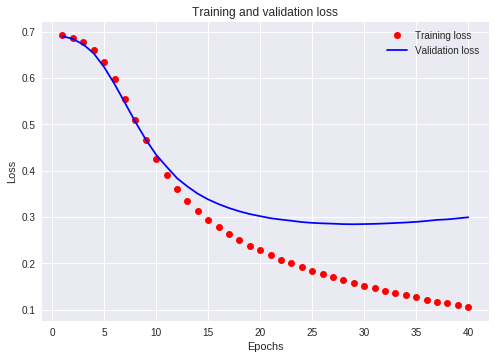

In [84]:
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

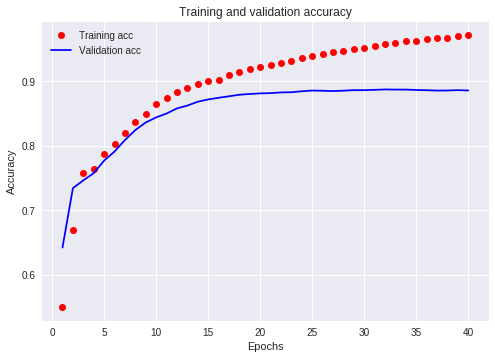

In [89]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()